#Self Organizing Map

##Install MiniSom Package

In [1]:
!pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for MiniSom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=cac94e48ecff1aec0a62b8ffb34ba873f92143170ebeb9ae47be7c0b6f8d1f2a
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built MiniSom


### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]


In [5]:
print(y)

[0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0
 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1
 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1
 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1
 0 0 0 1 1 1 1 1 0 1 1 0 

## Feature Scaling


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [7]:
print(X)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


##Training the SOM


In [8]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
# Here the value of input_len is the number of feature in the dataset i.e. X.
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

##Visualizing the results


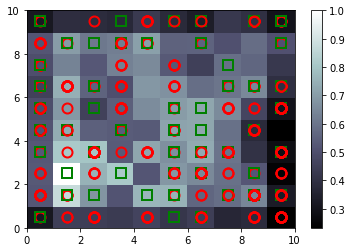

In [9]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2
    )
show()

## Finding the frauds


In [10]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [11]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15567839
15671014
15579583
15642336
15622083
15585855
15799785
15589881
